<a href="https://colab.research.google.com/github/Nicolas-NDK/avd2_dlib_topicos_especiais/blob/main/Snippets_Importing_libraries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing a library that is not in Colaboratory

To import a library that's not in Colaboratory by default, you can use `!pip install` or `!apt-get install`.

In [1]:
#Aqui importamos nossas dependências (openCV, NumPy, Cv2 para exibir as imagens, etc).
from PIL import Image
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [2]:
# Importando a dlib.
import dlib

In [30]:
#Agora carregamos o detector de marcos faciais da dlib.
detector_pontos = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

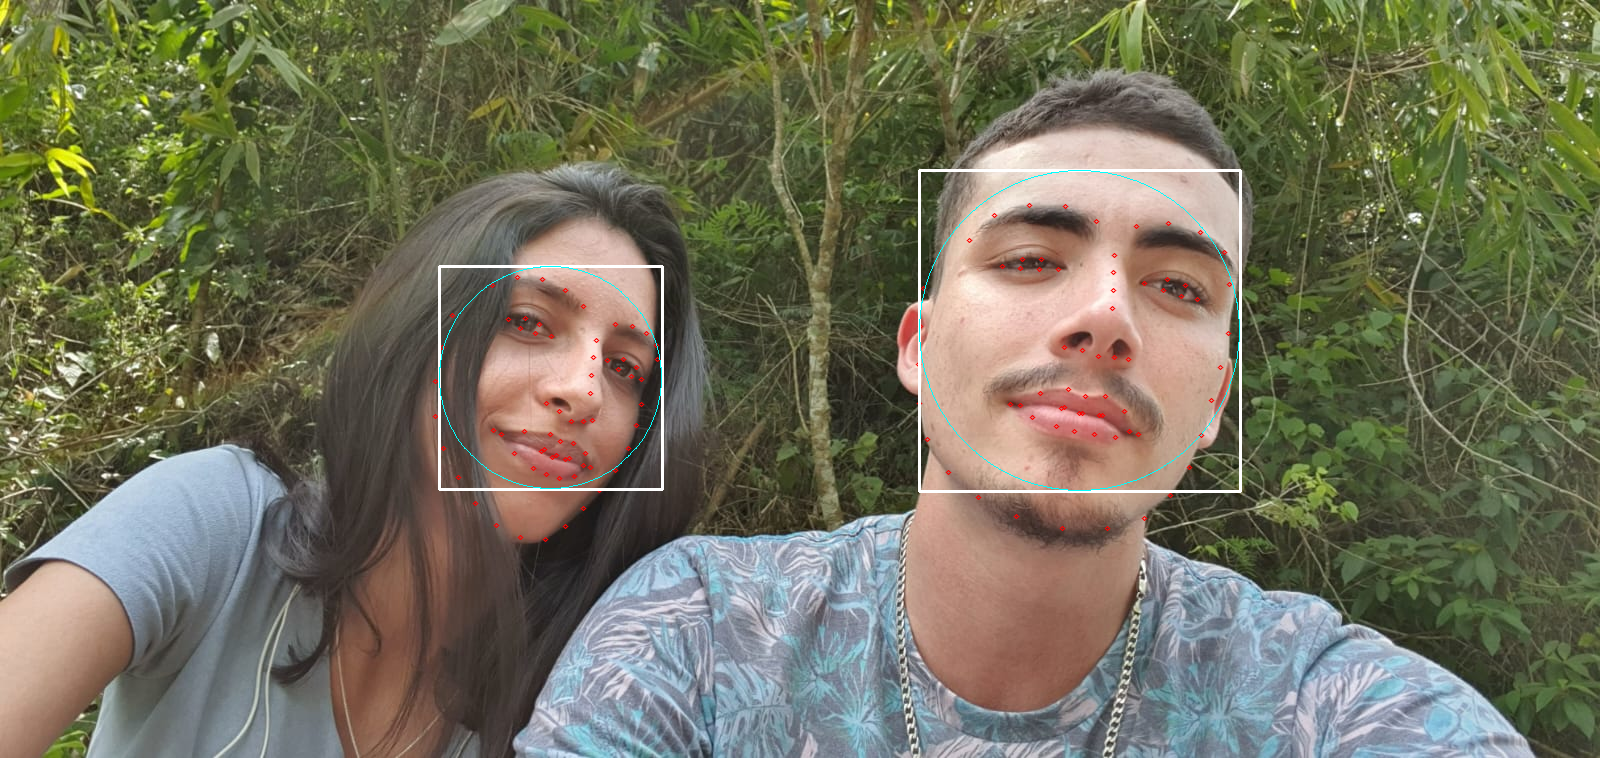

In [72]:
#Carregar o detector de faces da dlib para encontrar as faces na imagem utilizada.
detector_face = dlib.get_frontal_face_detector()

#Carregamos nossa imagem.
imagem = cv2.imread('foto.jpeg')

#declaramos
deteccoes = detector_face(imagem, 1)
for face in deteccoes:

  pontos = detector_pontos(imagem, face)

     
  #Sintaxe: cv2.circle (imagem, cordenadas, raio, cor, espessura)
  #imagem: É a imagem na qual o círculo deve ser desenhado. 
  #cordenadas: São as coordenadas do centro do círculo.( valor da coordenada X , valor da coordenada Y ). 
  #raio: é o raio do círculo. 
  #cor: é a cor da linha limite do círculo a ser desenhada. Para BGR , como por exemplo(255, 255, 255) para a cor branca. 
  #espessura: É a espessura da linha da borda do círculo em px .
    
  for ponto in pontos.parts():
    cv2.circle(imagem, (ponto.x, ponto.y), 2, (0,0,255), 1,75)

  #Agora fazemos um retungula tendo como base a face que nos identificamos 
  #utilizando do mesmo principio do circle utilizado a cima 
  l, t, r, b = face.left(), face.top(), face.right(), face.bottom()
  cv2.rectangle(imagem, (l,t), (r, b), (255,255,255), 2)

  #Fazemos um circulo tendo como base o centro do retangulo utilizado anteriormente
  cv2.circle(imagem, ((l+r)//2, (t+b)//2), (r-l)//2, (255,255,0), 1,5)


#finalizamos e renderizamos a imagem
cv2_imshow(imagem)